Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)         

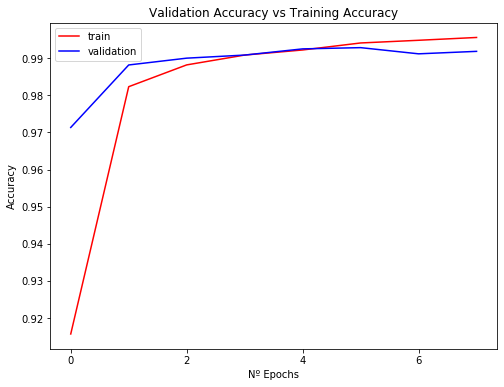

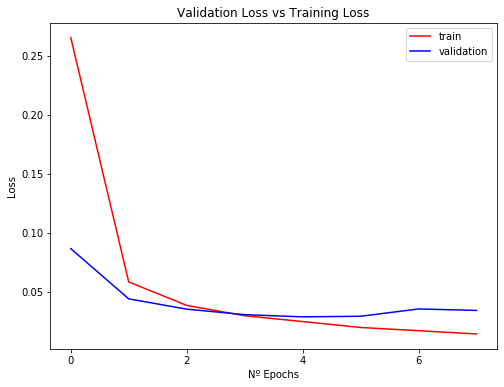

In [7]:
#!/usr/bin/env python

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras.layers.normalization import BatchNormalization


# nº de instancias que se realizan antes de una actualización de pesos
batch_size = 128 
# nº iteraciones que se ejecuta el proceso de entrenamiento
epochs = 50#28
# % reservado para datos de validación
test_size = 0.1 
# mezcla los datos en cada época
shuffle=True 

# medida de error
loss="categorical_crossentropy"
# Optimizacion 
optimizer="RMSprop"

#precarga de los datos de mnist que contiene keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# añadimos una dimension para convolucion
x_train = x_train.reshape(x_train.shape+(1,))                                    
x_test = x_test.reshape(x_test.shape+(1,)) 

# normalización de los datos de entrada
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

#categorial
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

#dibido conjunto de entrenamiento y validación
X2_train, X_val, Y2_train, Y_val = train_test_split(x_train, y_train, test_size = test_size, random_state=42)

#clase secuencial para definición de modelo
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


# comprobar architectura de nuestro modelo.
model.summary()
#######################################################
model.compile(loss=loss,
optimizer=optimizer,
metrics = ['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0.001,
                          verbose=1, 
                          patience=3, 
                          mode='auto')
modcheck = ModelCheckpoint('best_model.h5',
                           monitor='val_accuracy',
                           mode='max',
                           verbose=1, 
                           save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001)

# cuento el tiempo
start = time.time()

# Entrenando datos
print(" Entrenando datos ")
snn = model.fit(x=X2_train, y=Y2_train, 
                batch_size=batch_size, 
                epochs=epochs, 
                verbose=1, 
                validation_data=(X_val, Y_val), 
                shuffle=shuffle,
                callbacks=[earlystop]) 


# Tiempo de entrenamiento
end = time.time()
print(" Tiempo de entrenamiento: ")
print(end - start)

#evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Train accuracy:', train_acc)
print('Train loss:', train_loss)

###################################################
#Algoritmo de entrenamiento
print('Algoritmo de entrenamiento usado: ', optimizer)
#valores de sus parámetros
print('Valores de sus parámetros') 
print('Nº instancias: ', batch_size) 
print('Iteraciones del proceso de entrenamiento: ', epochs) 
print('Funcion de perdida para guiar el optimizador: ', loss)

#Tasa de error sobre el conjunto de prueba (%)
print('Tasa de error sobre el conjunto de prueba: {0:.2f}%'.format((1-test_acc)*100))
#Tasa de error sobre el conjunto de entrenamiento (%)
print('Tasa de error sobre el conjunto de entrenamiento: {0:.2f}%'.format((1-train_acc)*100))

print(" Tiempo de entrenamiento: ")
print(end - start)

###################################################

# grafica comparativa de accuary validación y entrenamiento 
plt.figure(0)  
plt.plot(snn.history['accuracy'],'r')  
plt.plot(snn.history['val_accuracy'],'b')  
epochs=len(snn.history['accuracy'])
plt.xticks(np.arange(0, epochs, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Nº Epochs")  
plt.ylabel("Accuracy")  
plt.title("Validation Accuracy vs Training Accuracy")  
plt.legend(['train','validation'])

# grafica comparativa de loss validación y entrenamiento 
plt.figure(1)  
plt.plot(snn.history['loss'],'r')  
plt.plot(snn.history['val_loss'],'b')  
plt.xticks(np.arange(0, epochs, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Nº Epochs")  
plt.ylabel("Loss")  
plt.title("Validation Loss vs Training Loss")  
plt.legend(['train','validation'])

plt.show() 



In [9]:
#Algoritmo de entrenamiento
print('Algoritmo de entrenamiento usado: ', optimizer)
#valores de sus parámetros
print('Valores de sus parámetros') 
print('Nº instancias: ', batch_size) 
epochs=len(snn.history['accuracy'])
print('Iteraciones del proceso de entrenamiento: ', epochs) 
print('Funcion de perdida para guiar el optimizador: ', loss)

#Tasa de error sobre el conjunto de prueba (%)
print('Tasa de error sobre el conjunto de prueba: {0:.2f}%'.format((1-test_acc)*100))
#Tasa de error sobre el conjunto de entrenamiento (%)
print('Tasa de error sobre el conjunto de entrenamiento: {0:.2f}%'.format((1-train_acc)*100))

print(" Tiempo de entrenamiento: ")
print(end - start)

Algoritmo de entrenamiento usado:  RMSprop
Valores de sus parámetros
Nº instancias:  128
Iteraciones del proceso de entrenamiento:  8
Funcion de perdida para guiar el optimizador:  categorical_crossentropy
Tasa de error sobre el conjunto de prueba: 0.62%
Tasa de error sobre el conjunto de entrenamiento: 0.24%
 Tiempo de entrenamiento: 
533.9066443443298


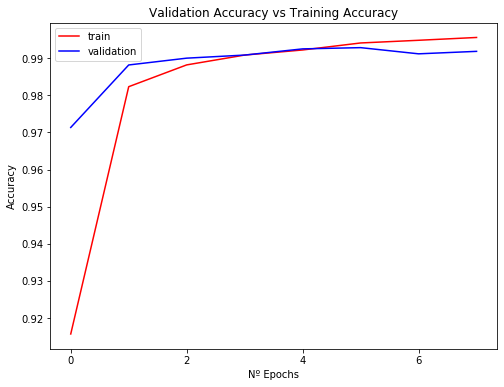

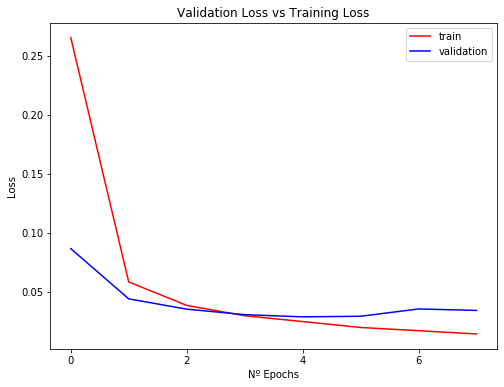

In [10]:
# grafica comparativa de accuary validación y entrenamiento 
plt.figure(0)  
plt.plot(snn.history['accuracy'],'r')  
plt.plot(snn.history['val_accuracy'],'b')  
plt.xticks(np.arange(0, epochs, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Nº Epochs")  
plt.ylabel("Accuracy")  
plt.title("Validation Accuracy vs Training Accuracy")  
plt.legend(['train','validation'])

# grafica comparativa de loss validación y entrenamiento 
plt.figure(1)  
plt.plot(snn.history['loss'],'r')  
plt.plot(snn.history['val_loss'],'b')  
plt.xticks(np.arange(0, epochs, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Nº Epochs")  
plt.ylabel("Loss")  
plt.title("Validation Loss vs Training Loss")  
plt.legend(['train','validation'])

plt.show() 

In [11]:
# Etiquetas asignadas a los casos del conjunto de prueba
result = model.predict(x_test)
class_result=np.argmax(result,axis=-1)

f = open("out.txt","w")
for i in range(len(class_result)):
    f.write(str(class_result[i]))
f.close()

In [12]:
metrics = model.evaluate(x_test, y_test)

for i in range(len(metrics)):
    print( model.metrics_names[i]," = ",metrics[i])
    
result = model.predict(x_test)
class_result=np.argmax(result,axis=-1)
errores = 0

for i in range(len(class_result)):
    if class_result[i] != np.argmax(y_test[i]):
        print(i)
        errores+=1

print ("Errores ",errores)

10000/10000 [==============================] - 3s 322us/step
loss  =  0.02199696728564504
accuracy  =  0.9937999844551086
247
340
449
582
593
619
947
966
1014
1039
1226
1232
1247
1260
1299
1522
1888
1901
2035
2070
2129
2130
2135
2189
2293
2329
2414
2447
2597
2654
2927
3225
3422
3520
3762
3767
3808
4007
4078
4289
4571
4699
4740
4761
4823
5654
5937
6172
6571
6576
6597
6625
6651
7991
8287
8527
9015
9530
9642
9679
9692
9729
Errores  62
